In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

In [9]:
DATA_PATH = "../data"

In [10]:
date_cols = [
    "FIRST_COLLECTION_SCHEDULE_EARLIEST",
    "FIRST_COLLECTION_SCHEDULE_LATEST",
    "LAST_DELIVERY_SCHEDULE_EARLIEST",
    "LAST_DELIVERY_SCHEDULE_LATEST",
]
unlabelled = pd.read_csv(f"{DATA_PATH}/New_bookings_with_predictions.csv", parse_dates=date_cols)
train_predictions = pd.read_csv(f"{DATA_PATH}/train_predictions.csv")
test_predictions = pd.read_csv(f"{DATA_PATH}/test_predictions.csv")

In [31]:
train_stats = train_predictions["proba"].describe().rename("Train")
train_stats

count    2076.000000
mean        0.374442
std         0.236302
min         0.002071
25%         0.192231
50%         0.354839
75%         0.547730
max         0.940932
Name: Train, dtype: float64

In [32]:
test_stats = test_predictions["proba"].describe().rename("Test")
test_stats

count    519.000000
mean       0.379729
std        0.226712
min        0.002071
25%        0.224687
50%        0.361038
75%        0.538884
max        0.902241
Name: Test, dtype: float64

In [33]:
unlabelled_stats = unlabelled["DELAY_PROBABILITY"].describe().rename("Unlabelled")
unlabelled_stats

count    1000.000000
mean        0.458908
std         0.180406
min         0.077006
25%         0.329159
50%         0.412075
75%         0.582847
max         0.916795
Name: Unlabelled, dtype: float64

In [39]:
pred_stats = (pd.concat([train_stats, test_stats, unlabelled_stats], axis=1))
pred_stats

,Train,Test,Unlabelled
count,2076.000000,519.000000,1000.000000
mean,0.374442,0.379729,0.458908
std,0.236302,0.226712,0.180406
min,0.002071,0.002071,0.077006
25%,0.192231,0.224687,0.329159
50%,0.354839,0.361038,0.412075
75%,0.547730,0.538884,0.582847
max,0.940932,0.902241,0.916795


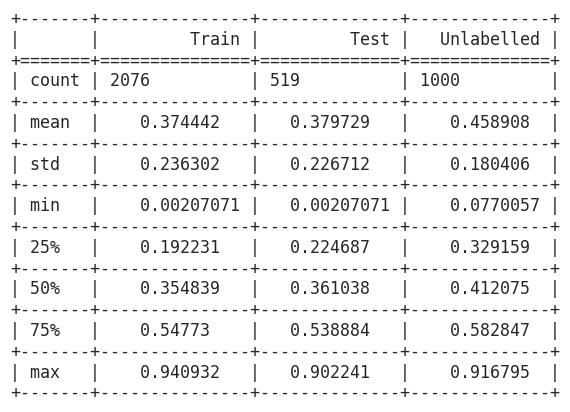

In [12]:
sns.set_theme(style="darkgrid")

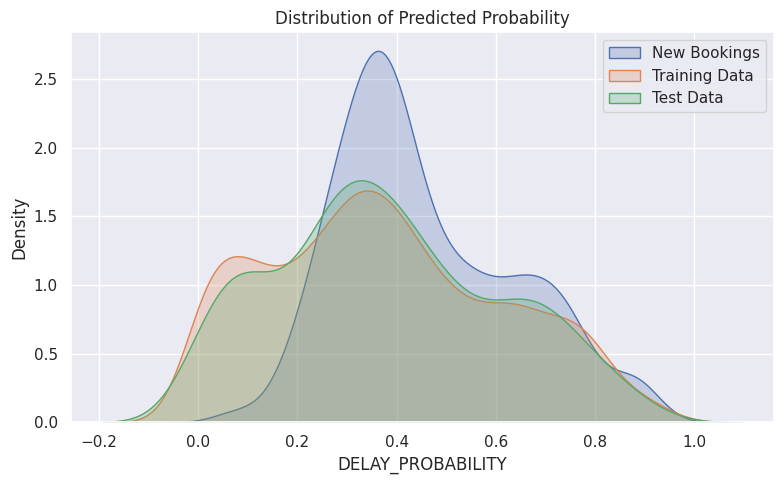

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(unlabelled["DELAY_PROBABILITY"], fill=True)
sns.kdeplot(train_predictions["proba"], fill=True)
sns.kdeplot(test_predictions["proba"], fill=True)
plt.title("Distribution of Predicted Probability")
plt.legend(["New Bookings", "Training Data", "Test Data"])
plt.tight_layout()
plt.show()